In [1]:
import aisisax.object_detection.lsa_interface as aisax_object_detection
import aisisax.llm.openai_connector as aisax_openai
import aisisax.llm.ollama_connector as aisax_ollama

from IPython.display import display

In [2]:
pImage = "assets/car.jpeg"

# Object detection

In [3]:
bbox = aisax_object_detection.call_lsa(pImage, "yellow car")

In [5]:
bbox

array([[ 463.0585,  502.564 , 1873.1929, 1027.0621]], dtype=float32)

In [6]:
from PIL import Image, ImageDraw
def draw_bboxes_on_image(image_path, boxes):
    # Open the image
    image = Image.open(image_path)
    
    # Create a draw object
    draw = ImageDraw.Draw(image)
    
    # Draw each bounding box
    for box in boxes:
        x1, y1, x2, y2 = box
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
    
    return image

In [7]:
image = draw_bboxes_on_image(pImage, bbox)

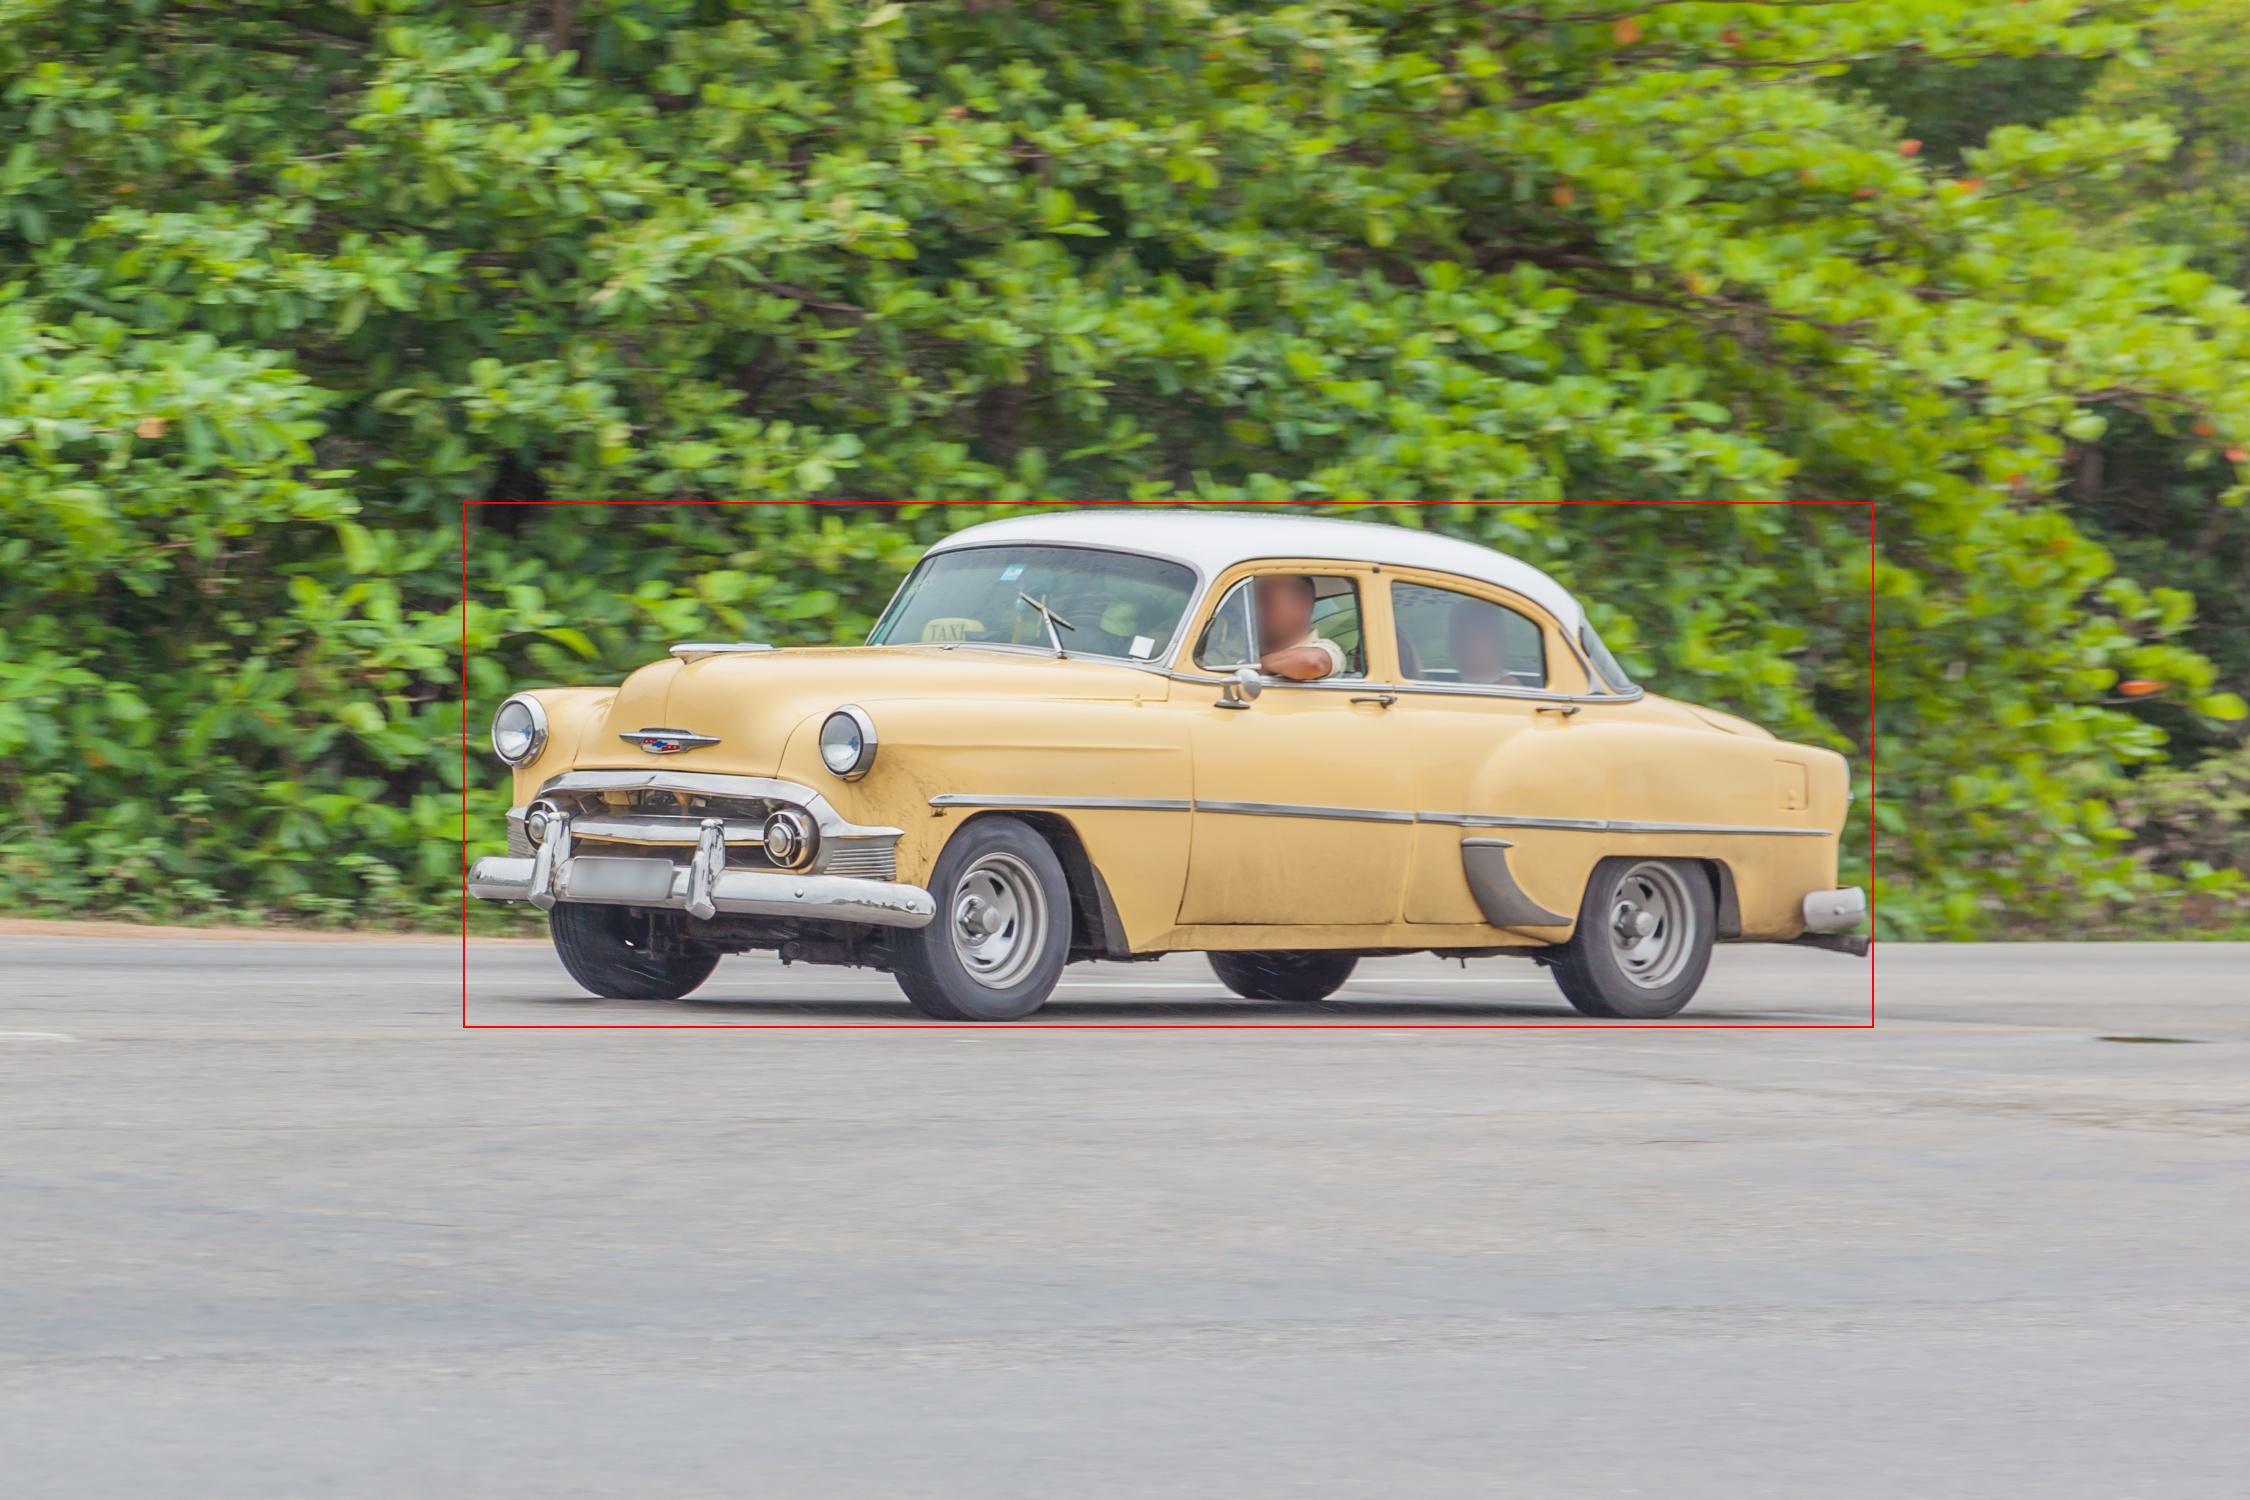

In [8]:
display(image)

# Interaktion mit LLMs
In den folgenden Zellen wird der Code zur Interaktion mit multi-modalen LLMs gezeigt. Wir nutzen sowohl GPT4o für einfache Textanfragen, sowie für multi-modale Text-Bild-Anfragen. Im Anschluss wird die gleiche Funktionalität noch für ein selbst-gehostetes open-source LLM bei Cloud&Heat per ollama gezeigt.

## OpenAI GPT-4o

In [3]:
aisax_openai.generate_answer("Warum ist der Himmel blau?")

'Der Himmel erscheint blau, weil die Erdatmosphäre das Sonnenlicht streut. Sonnenlicht besteht aus vielen Farben, die zusammen weiß erscheinen. Wenn das Licht die Atmosphäre durchdringt, werden die kürzeren blauen Wellenlängen des Lichts stärker gestreut als die längeren roten Wellenlängen. Dieser Prozess wird als Rayleigh-Streuung bezeichnet. Dadurch wird mehr blaues Licht in alle Richtungen gestreut und erreicht unsere Augen, wodurch der Himmel blau erscheint.'

In [6]:
aisax_openai.generate_multimodal_answer("Beschreibe das Bild", image_path=pImage)

'Das Bild zeigt ein klassisches Auto in einem gelblichen Farbton, das auf einer Straße fährt. Der Wagen hat ein Retro-Design, wie es in den 1950er Jahren populär war, mit runden Scheinwerfern und verchromten Stoßfängern. Im Hintergrund sind grüne Büsche oder Bäume zu sehen.'

## LLAMA3.1 90B via OLLAMA @ CLOUD&HEAT

In [14]:
aisax_ollama.generate_multimodal_answer("Beschreibe das Auto für einen News-Artikel für LinkedIn. Formuliere spannend und langweile die Zielgruppe (Kunden von Cloud & Heat Dresden) nicht!", image_path=pImage, model="llama3.2-vision:90b")

'Das Auto auf dem Bild ist ein Chevrolet 210 aus dem Jahr 1950. Es handelt sich um einen klassischen, zweitürigen Sedan mit einer markanten Frontpartie und einem chromverzierten Kühlergrill. Der Wagen verfügt über eine breite Motorhaube und einen langen Heckspoiler, der ihn zu einem echten Hingucker macht. Die Farbe des Autos ist ein dunkles Blau, das sich perfekt mit dem hellen Himmel abhebt.\nDer Chevrolet 210 ist ein Symbol für die amerikanische Automobilkultur der 1950er Jahre und ein Zeugnis für die Ingenieurskunst seiner Zeit. Mit seinem robusten Motor und seiner komfortablen Ausstattung war er damals ein beliebtes Modell unter den Autofahrern.\nHeute ist der Chevrolet 210 ein begehrtes Sammlerstück und ein echter Oldtimer, der von vielen Automobilen enthusiastisch gesammelt wird. Seine klassische Optik und seine historische Bedeutung machen ihn zu einem unvergleichlichen Fahrzeug, das jeden Autofahrer begeistert.\nIch hoffe, diese Beschreibung hat Ihnen gefallen und Sie konnten 

In [5]:
# llama3.2-vision:90b
# llama3.1:70b

In [ ]:
aisax_ollama.generate_multimodal_answer("Was für ein Auto ist in dem Bild?", image_path=pImage, model="llama3.1:70b")